# Natural Language Understanding
+ ● Use World Bank Projects dataset
+ ○ Option 1. Tagging for Keyword Extraction or Named Entity Recognition (NER) using models such as YAKE, BERT-derived models, spaCy, or Google NLP API
+ ■ Specifically identify either “sector” or “sub-sector” or entities like Government Agency, Company Name, Contractors, Investor, or unit measurements such as cost per square kilometer.
+ ● Option 2. Binary Classifier
+ ○ Using the status variable build a binary classifier to predict the probability whether a project will be “closed” or “canceled/distressed”

### Option 2:  Here I worked on binary classifier to predict the probability whether a project will be “closed” or “canceled/distressed”

# Import The Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read The Data

In [3]:
initial_data = pd.read_excel('World_Bank_Projects_downloaded_7_1_2022.xls')
initial_data.head()

,"World Bank Projects, data as of 03/29/2022 22:00:01 EST",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,NaN,http://projects.worldbank.org/P173711/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF MADAGASCAR,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,NaN,http://projects.worldbank.org/P175747/null?lan...,2022-03-25T00:00:00Z,...,0,Kingdom of Morocco,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [4]:
new_header = initial_data.iloc[0] #grab the first row for the header
initial_data = initial_data[1:] #take the data less the header row
initial_data.columns = new_header #set the header row as the df header

In [5]:
initial_data.head()

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,NaN,http://projects.worldbank.org/P173711/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF MADAGASCAR,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,NaN,http://projects.worldbank.org/P175747/null?lan...,2022-03-25T00:00:00Z,...,0,Kingdom of Morocco,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,P175792,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,Invigorating local market & competition in Pub...,Malawi - Public Procurement and Disposal of As...,NaN,http://projects.worldbank.org/P175792/null?lan...,2022-03-25T00:00:00Z,...,410000,Republic of Malawi,Investment Project Financing,C,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data= initial_data.drop(index=1)
data.head()

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,NaN,http://projects.worldbank.org/P173711/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF MADAGASCAR,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,NaN,http://projects.worldbank.org/P175747/null?lan...,2022-03-25T00:00:00Z,...,0,Kingdom of Morocco,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,P175792,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,Invigorating local market & competition in Pub...,Malawi - Public Procurement and Disposal of As...,NaN,http://projects.worldbank.org/P175792/null?lan...,2022-03-25T00:00:00Z,...,410000,Republic of Malawi,Investment Project Financing,C,NaN,NaN,NaN,NaN,NaN,NaN
6,P177073,East Asia and Pacific,Federated States of Micronesia,Active,Federated States of Micronesia Strategic Clima...,To improve the climate resilience of the Recip...,"Department of Transportation, Communications &...",NaN,http://projects.worldbank.org/P177073/null?lan...,2022-03-25T00:00:00Z,...,0,Federated States of Micronesia,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data = data.reset_index(drop=True)
data.head()

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,NaN,http://projects.worldbank.org/P173711/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF MADAGASCAR,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,NaN,http://projects.worldbank.org/P175747/null?lan...,2022-03-25T00:00:00Z,...,0,Kingdom of Morocco,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P175792,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,Invigorating local market & competition in Pub...,Malawi - Public Procurement and Disposal of As...,NaN,http://projects.worldbank.org/P175792/null?lan...,2022-03-25T00:00:00Z,...,410000,Republic of Malawi,Investment Project Financing,C,NaN,NaN,NaN,NaN,NaN,NaN
4,P177073,East Asia and Pacific,Federated States of Micronesia,Active,Federated States of Micronesia Strategic Clima...,To improve the climate resilience of the Recip...,"Department of Transportation, Communications &...",NaN,http://projects.worldbank.org/P177073/null?lan...,2022-03-25T00:00:00Z,...,0,Federated States of Micronesia,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing Values

In [8]:
data.isna().sum()

0
Project ID                               0
Region                                   2
Country                                  2
Project Status                           3
Project Name                             0
Project Development Objective         9962
Implementing Agency                  14938
Consultant Services Required         21459
Project URL                              0
Board Approval Date                   2870
Project Closing Date                  5029
Financing Type                        8611
Current Project Cost                   147
IBRD Commitment                          0
IDA Commitment                           0
Total IDA and IBRD Commitment            0
Grant Amount                             0
Borrower                             15170
Lending Instrument                     248
Environmental Assessment Category     8404
Environmental and Social Risk        21460
Sector 1                              1994
Sector 2                             10431
Sector 3 

<AxesSubplot:xlabel='0'>

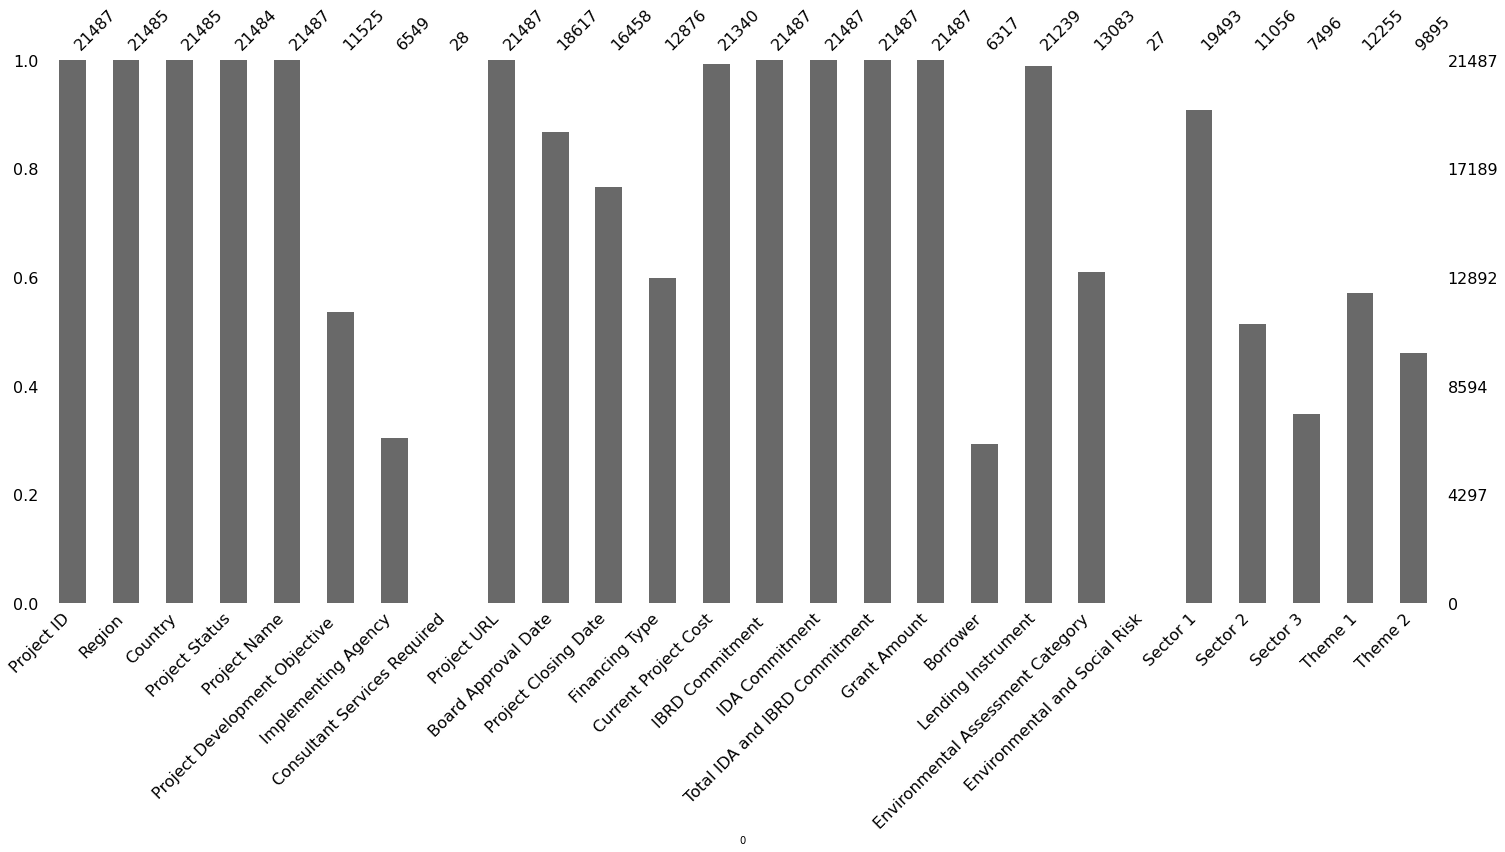

In [9]:
import missingno as msno
msno.bar(data)

In [10]:
#% of null values
data_percentage=print('percentage of missing values'.upper())
data.isna().sum()/data.shape[0]*100

PERCENTAGE OF MISSING VALUES


0
Project ID                            0.000000
Region                                0.009308
Country                               0.009308
Project Status                        0.013962
Project Name                          0.000000
Project Development Objective        46.362917
Implementing Agency                  69.521106
Consultant Services Required         99.869689
Project URL                           0.000000
Board Approval Date                  13.356913
Project Closing Date                 23.404849
Financing Type                       40.075394
Current Project Cost                  0.684135
IBRD Commitment                       0.000000
IDA Commitment                        0.000000
Total IDA and IBRD Commitment         0.000000
Grant Amount                          0.000000
Borrower                             70.600828
Lending Instrument                    1.154186
Environmental Assessment Category    39.112021
Environmental and Social Risk        99.874343
Sector 1   

In [11]:
# Dropping Clomns with more than 90% missing values and dropping some more on domain knowledge

In [12]:
drop = ['Consultant Services Required','Environmental and Social Risk']
data.drop(drop,axis=1,inplace=True)

In [13]:
data.isna().sum()

0
Project ID                               0
Region                                   2
Country                                  2
Project Status                           3
Project Name                             0
Project Development Objective         9962
Implementing Agency                  14938
Project URL                              0
Board Approval Date                   2870
Project Closing Date                  5029
Financing Type                        8611
Current Project Cost                   147
IBRD Commitment                          0
IDA Commitment                           0
Total IDA and IBRD Commitment            0
Grant Amount                             0
Borrower                             15170
Lending Instrument                     248
Environmental Assessment Category     8404
Sector 1                              1994
Sector 2                             10431
Sector 3                             13991
Theme 1                               9232
Theme 2  

In [14]:
cateogry_columns=data.select_dtypes(include=['category']).columns.tolist()
integer_columns=data.select_dtypes(include=['bool']).columns.tolist()

for column in data:
    if data[column].isnull().any():
        if(column in cateogry_columns):
            data[column]=data[column].fillna(data[column].mode()[0])
        else:
            data[column]=data[column].fillna(data[column].mean)

In [15]:
data.isna().sum()

0
Project ID                           0
Region                               0
Country                              0
Project Status                       0
Project Name                         0
Project Development Objective        0
Implementing Agency                  0
Project URL                          0
Board Approval Date                  0
Project Closing Date                 0
Financing Type                       0
Current Project Cost                 0
IBRD Commitment                      0
IDA Commitment                       0
Total IDA and IBRD Commitment        0
Grant Amount                         0
Borrower                             0
Lending Instrument                   0
Environmental Assessment Category    0
Sector 1                             0
Sector 2                             0
Sector 3                             0
Theme 1                              0
Theme 2                              0
dtype: int64

### Data Info

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21487 entries, 0 to 21486
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Project ID                         21487 non-null  object
 1   Region                             21487 non-null  object
 2   Country                            21487 non-null  object
 3   Project Status                     21487 non-null  object
 4   Project Name                       21487 non-null  object
 5   Project Development Objective      21487 non-null  object
 6   Implementing Agency                21487 non-null  object
 7   Project URL                        21487 non-null  object
 8   Board Approval Date                21487 non-null  object
 9   Project Closing Date               21487 non-null  object
 10  Financing Type                     21487 non-null  object
 11  Current Project Cost               21487 non-null  object
 12  IBRD

### Data Transformation 

In [17]:
# Turn categorical variables into numbers and fill missing
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        data[label] = pd.Categorical(content).codes+1

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21487 entries, 0 to 21486
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Project ID                         21487 non-null  int16
 1   Region                             21487 non-null  int8 
 2   Country                            21487 non-null  int16
 3   Project Status                     21487 non-null  int8 
 4   Project Name                       21487 non-null  int16
 5   Project Development Objective      21487 non-null  int16
 6   Implementing Agency                21487 non-null  int16
 7   Project URL                        21487 non-null  int16
 8   Board Approval Date                21487 non-null  int16
 9   Project Closing Date               21487 non-null  int16
 10  Financing Type                     21487 non-null  int16
 11  Current Project Cost               21487 non-null  int16
 12  IBRD Commitment   

In [19]:
data.head(20)

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Project URL,Board Approval Date,Project Closing Date,...,Total IDA and IBRD Commitment,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,19456,3,90,2,16988,3835,2355,19456,5940,1,...,1799,1,1554,4,1,1,1,1,1,1
1,20103,3,134,2,3421,2951,3831,20103,5940,1,...,1748,1,1570,7,1,1,1,1,1,1
2,20636,8,60,2,13666,7106,1821,20636,5940,1,...,1467,1,725,7,1,1,1,1,1,1
3,20648,3,135,2,8202,831,1678,20648,5940,1,...,1,42,1681,7,4,1,1,1,1,1
4,21028,5,36,2,5635,8819,731,21028,5940,1,...,616,1,381,7,1,1,1,1,1,1
5,21083,8,204,2,16313,660,2080,21083,5940,1,...,1,751,1509,7,1,1,1,1,1,1
6,21256,3,90,2,1364,1975,3360,21256,5940,1,...,873,1,1601,7,1,1,1,1,1,1
7,20397,4,101,2,2904,2018,4084,20397,5939,1,...,1653,1,1621,7,1,1,1,1,1,1
8,20706,7,103,2,12744,8751,2132,20706,5939,1,...,1032,1,1625,10,1,1,1,1,1,1
9,20937,7,103,2,5327,4101,3382,20937,5939,1,...,1857,1,1625,4,1,1,1,1,1,1


### Data Describe

In [20]:
data.describe()

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Project URL,Board Approval Date,Project Closing Date,...,Total IDA and IBRD Commitment,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
count,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,...,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000,21487.000000
mean,10744.000000,5.860288,108.869316,3.040210,9338.099688,2653.873598,700.706055,10744.000000,2562.753991,666.429609,...,620.688044,60.237399,336.420906,11.645134,2.593568,91.453856,31.568018,17.767534,22.294411,18.910318
std,6202.906953,2.204885,55.343831,0.645957,5325.181924,3226.913826,1250.967223,6202.906953,1819.944432,556.453127,...,557.033136,170.486521,605.059700,5.148304,1.633672,49.200115,34.787284,27.370966,24.875001,24.567723
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5372.500000,4.000000,63.000000,3.000000,4709.500000,1.000000,1.000000,5372.500000,1039.000000,132.000000,...,115.000000,1.000000,1.000000,7.000000,1.000000,66.000000,1.000000,1.000000,1.000000,1.000000
50%,10744.000000,6.000000,116.000000,3.000000,9277.000000,692.000000,1.000000,10744.000000,2394.000000,568.000000,...,479.000000,1.000000,1.000000,14.000000,3.000000,100.000000,22.000000,1.000000,8.000000,1.000000
75%,16115.500000,7.000000,151.000000,3.000000,13888.500000,5288.500000,982.500000,16115.500000,4071.000000,1093.000000,...,1059.000000,1.000000,449.000000,16.000000,4.000000,127.000000,61.000000,26.000000,45.000000,38.000000
max,21487.000000,10.000000,207.000000,5.000000,18549.000000,9811.000000,4565.000000,21487.000000,5940.000000,1813.000000,...,1903.000000,967.000000,2173.000000,19.000000,9.000000,160.000000,103.000000,91.000000,74.000000,74.000000


### Target Column

In [21]:
data["Project Status"].value_counts()

3    15718
2     2985
4     1707
5     1074
1        3
Name: Project Status, dtype: int64

In [22]:
#before conversion
initial_data['Project Status'].unique()

array(['projectstatusdisplay', 'Active', 'Closed', nan, 'Pipeline',
       'Dropped'], dtype=object)

In [23]:
#after conversion
data['Project Status'].unique()

array([2, 3, 1, 5, 4], dtype=int8)

In [24]:
#projectstatusdisplay=2, closed=1, pipeline=5  and active= 3 as 0 and dropped=4 as 1
data["Project Status"].replace({3: 0, 4:1, 2:0, 1:0, 5:0}, inplace=True)
data['Project Status'].unique()

array([0, 1], dtype=int8)

In [25]:
data["Project Status"].value_counts()

0    19780
1     1707
Name: Project Status, dtype: int64

# Feature Selection

### Data correlation

In [26]:
corr_matrix=data.corr()
corr_matrix

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Project URL,Board Approval Date,Project Closing Date,...,Total IDA and IBRD Commitment,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,,,,,,,,,,,,,,,,,,,,,
Project ID,1.000000,0.055577,-0.000906,0.010377,-0.046349,0.656079,0.593180,1.000000,0.584228,0.354343,...,0.113457,0.213861,0.614712,-0.562736,-0.048385,0.150227,0.276113,0.167374,0.051417,-0.002926
Region,0.055577,1.000000,-0.153828,0.020644,-0.022986,-0.032681,-0.024786,0.055577,-0.054795,-0.019456,...,0.131345,-0.003635,-0.042333,0.029601,-0.020584,0.019876,-0.021831,-0.036388,0.004592,-0.007658
Country,-0.000906,-0.153828,1.000000,0.005181,0.134455,0.002952,0.023727,-0.000906,-0.001043,-0.006938,...,-0.021788,0.024401,0.101647,-0.013779,-0.005293,-0.020136,-0.016065,-0.019207,-0.016213,-0.025295
Project Status,0.010377,0.020644,0.005181,1.000000,0.003204,0.002404,-0.043790,0.010377,-0.413517,-0.345495,...,0.048645,-0.018982,-0.042791,0.017542,0.088888,-0.214347,-0.122441,-0.104880,-0.051485,-0.055655
Project Name,-0.046349,-0.022986,0.134455,0.003204,1.000000,-0.032150,0.014380,-0.046349,-0.033887,0.033945,...,0.040459,-0.042322,0.012637,0.061595,0.003879,0.018380,0.001628,0.000101,0.014323,0.016146
Project Development Objective,0.656079,-0.032681,0.002952,0.002404,-0.032150,1.000000,0.439561,0.656079,0.445982,0.319551,...,0.069922,0.178848,0.441698,-0.389771,-0.027007,0.166413,0.256931,0.163489,0.095337,0.053631
Implementing Agency,0.593180,-0.024786,0.023727,-0.043790,0.014380,0.439561,1.000000,0.593180,0.439905,0.408099,...,0.139021,0.131191,0.740491,-0.420074,-0.141525,0.061349,0.196090,0.114587,-0.051064,-0.060258
Project URL,1.000000,0.055577,-0.000906,0.010377,-0.046349,0.656079,0.593180,1.000000,0.584228,0.354343,...,0.113457,0.213861,0.614712,-0.562736,-0.048385,0.150227,0.276113,0.167374,0.051417,-0.002926
Board Approval Date,0.584228,-0.054795,-0.001043,-0.413517,-0.033887,0.445982,0.439905,0.584228,1.000000,0.716869,...,0.007376,0.195702,0.450041,-0.361057,0.104192,0.519491,0.487573,0.328767,0.220255,0.167283


+ librimind.com: 'Data columns with very similar trends are also likely to carry very similar information. In this case, only one of them will suffice to feed the machine learning model. Here we calculate the correlation coefficient between numerical and nominal columns as the Coefficient and the Pearson’s chi square value respectively. Pairs of columns with correlation coefficient higher than a threshold are reduced to only one.

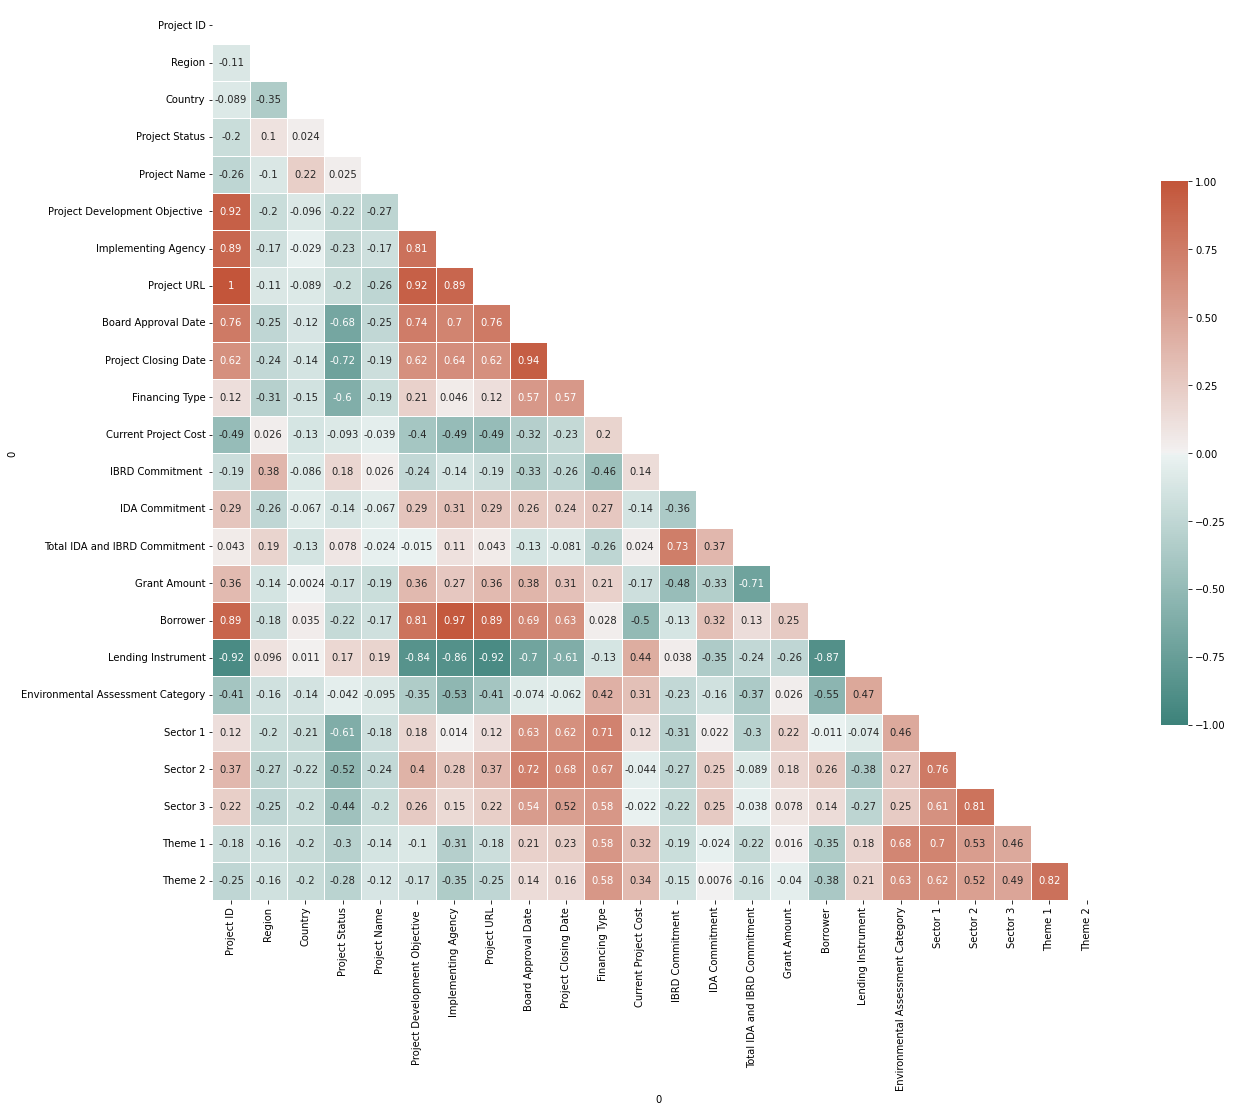

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = corr_matrix.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [28]:
# Brute Force Method to find Correlation between features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [29]:
correlated_features = correlation(data, threshold=0.8)
len(set(correlated_features))

1

In [30]:
len(correlated_features)
print(correlated_features)

{'Project URL'}


+ The above function shows only 1 feature are correlated with the other features in the dataset. So, we drop this feature.

In [31]:
data = data.drop(columns=['Project URL'])



# INPUT AND TARGET VARIABLES

In [32]:
data.columns = data.columns.str.replace('Project Status', 'Project_Status')

In [33]:
#data.rename(columns = {'Project status':'Project_status'}, inplace = False)

In [34]:
data.columns

Index(['Project ID', 'Region', 'Country', 'Project_Status', 'Project Name',
       'Project Development Objective ', 'Implementing Agency',
       'Board Approval Date', 'Project Closing Date', 'Financing Type',
       'Current Project Cost', 'IBRD Commitment ', 'IDA Commitment',
       'Total IDA and IBRD Commitment', 'Grant Amount', 'Borrower',
       'Lending Instrument', 'Environmental Assessment Category', 'Sector 1',
       'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2'],
      dtype='object', name=0)

In [35]:
X= data.iloc[:,data.columns!='Project_Status']
y =data['Project_Status']

In [36]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)
                                                  
                                                  
len(X_train), len(y_train), len(X_val), len(y_val)

(17189, 17189, 4298, 4298)

In [37]:
y_train, len(y_train)

(19316    1
 18498    1
 4045     0
 8766     0
 8013     0
         ..
 11284    0
 11964    0
 5390     0
 860      0
 15795    0
 Name: Project_Status, Length: 17189, dtype: int8,
 17189)

# Classifiers:
+ Logistic Regression
+ Decision Tree
+ Support Vector Machine
+ Random Forest
+ K-Nearest Neighbors


# Scoring:
+ precision score
+ recall score
+ F1 score
+ accuracy score
+ AUC/ROC

##### Logistic Regression

In [38]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Descision Tree

In [39]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### Support Vector Machine

In [40]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

#### Random Forest

In [41]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K Nearest Neighbour

In [42]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Comparison

In [43]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', ],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, forest_fit_time, KNN_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time,forest_score_time, KNN_score_time,],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy,forest_accuracy, KNN_accuracy,],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, forest_precision, KNN_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall,forest_recall, KNN_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1,forest_f1, KNN_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, forest_roc, KNN_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
3,Random Forest,1.378073,0.053016,0.990925,0.970566,0.967865,0.990905,0.998844
1,Decision Tree,0.035647,0.008176,0.986445,0.955709,0.952144,0.986401,0.952144
4,K-Nearest Neighbors,0.005075,0.723391,0.971726,0.932450,0.866713,0.970473,0.967555
2,Support Vector Machine,16.935746,0.510142,0.971668,0.931847,0.867401,0.970456,0.992707
0,Logistic Regression,0.177848,0.009551,0.970853,0.911807,0.886224,0.970416,0.990096


#### On Comparing all model algorithms accuracy "Random Forest Classifier" giving high accuracy with 99%